In [95]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sb
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

In [96]:
class_names = ['mountain','street','glacier','buildings','sea','forest']
class_names_label = {'mountain':0,
                    'street':1,
                    'glacier':2, 'buildings':3,'sea':4 , 'forest':5}
size = (150,150)
output = []

In [97]:
def data_load():
    datasets = ['seg_train/seg_train','seg_test/seg_test']
    for data in datasets:
        directory = './images/'+data
        images = []
        labels = []
        for folder in os.listdir(directory):
            if not folder.startswith('.'):
                curr_label = class_names_label[folder]
                for file in os.listdir(directory+"/"+folder):
                    img_path = directory + "/"+folder+"/"+file
                    curr_img = cv2.imread(img_path)
                    curr_img = cv2.resize(curr_img,size)
                    images.append(curr_img)
                    labels.append(curr_label)
        images,labels = shuffle(images,labels)
        images = np.array(images,dtype='float32')
        labels = np.array(labels, dtype='int32')
        output.append((images,labels))
    return output

In [98]:
(train_images,train_labels),(test_images,test_labels) = data_load()

In [99]:
train_labels.shape[0]

14034

In [100]:
test_labels.shape[0]

3000

In [101]:
trian_images = train_images/255.0
test_images = test_images/255.0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


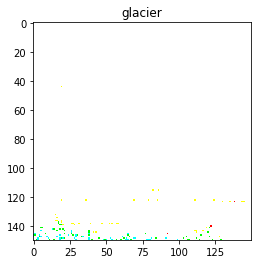

In [102]:
plt.figure()
plt.imshow(train_images[2])
plt.title(class_names[train_labels[2]])
plt.grid(False)
plt.show()

In [103]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),    #converting to 1d to add dense layers
    tf.keras.layers.Dense(128, activation=tf.nn.relu),   
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)  #add final output 6 classes with softmax
])

In [104]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               5308544   
_________________________________________________________________
dense_7 (Dense)              (None, 6)                

In [105]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [106]:
model.fit(train_images,train_labels,batch_size=128,epochs=5,validation_split=0.2)

Train on 11227 samples, validate on 2807 samples
Epoch 1/5
11227/11227 [==============================] - 203s 18ms/sample - loss: 54.0362 - accuracy: 0.2533 - val_loss: 1.6568 - val_accuracy: 0.3060
Epoch 2/5
11227/11227 [==============================] - 200s 18ms/sample - loss: 1.5099 - accuracy: 0.3951 - val_loss: 1.4793 - val_accuracy: 0.3962
Epoch 3/5
11227/11227 [==============================] - 198s 18ms/sample - loss: 1.1444 - accuracy: 0.5740 - val_loss: 1.3658 - val_accuracy: 0.4482
Epoch 4/5
11227/11227 [==============================] - 191s 17ms/sample - loss: 0.7597 - accuracy: 0.7161 - val_loss: 1.5032 - val_accuracy: 0.4621
Epoch 5/5
11227/11227 [==============================] - 184s 16ms/sample - loss: 0.5070 - accuracy: 0.8160 - val_loss: 1.6448 - val_accuracy: 0.4827


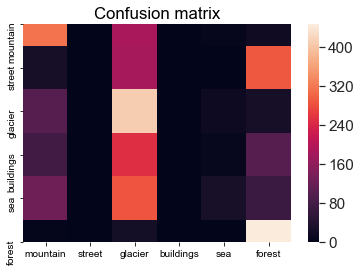

In [110]:
predictions = model.predict(test_images)
pre_labels = np.argmax(predictions,axis=1)
CM = confusion_matrix(test_labels, pre_labels)
ax = plt.axes()
sb.set(font_scale=1.4)
sb.heatmap(CM, annot=False,annot_kws={"size": 16},  xticklabels=class_names, yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()